In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/cifar100_apples_oranges/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/cifar100_apples_oranges/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/cifar100_apples_oranges/train/apple')))
print(len(os.listdir('/content/drive/MyDrive/cifar100_apples_oranges/train/orange')))
print(len(os.listdir('/content/drive/MyDrive/cifar100_apples_oranges/test/apple')))
print(len(os.listdir('/content/drive/MyDrive/cifar100_apples_oranges/test/orange')))


500
500
100
100


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 263ms/step - accuracy: 0.6357 - loss: 0.7558 - val_accuracy: 0.8600 - val_loss: 0.3521
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.8616 - loss: 0.3335 - val_accuracy: 0.9150 - val_loss: 0.2367
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.9135 - loss: 0.2327 - val_accuracy: 0.9450 - val_loss: 0.1544
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9254 - loss: 0.1758 - val_accuracy: 0.9600 - val_loss: 0.1629
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9271 - loss: 0.1832 - val_accuracy: 0.9600 - val_loss: 0.1421
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9651 - loss: 0.0847 - val_accuracy: 0.9450 - val_loss: 0.1681
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.9586 - loss: 0.0890 - val_accuracy: 0.9450 - val_loss: 0.2188
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9601 - loss: 0.1188 - val_accuracy: 0.9250 - val

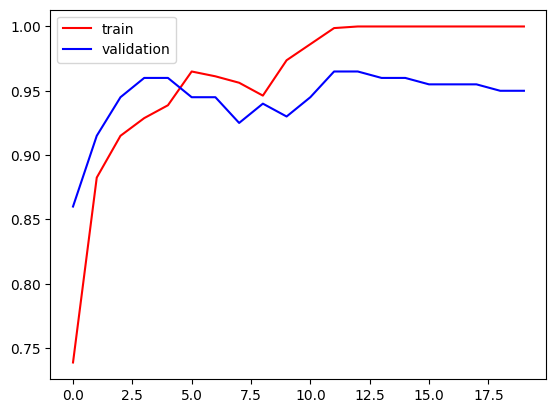

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

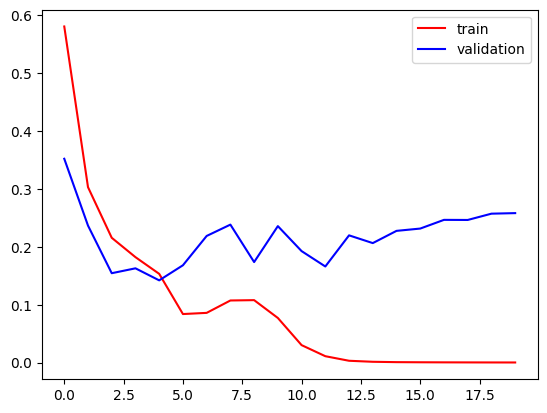

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[53 47]
 [45 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       100
           1       0.54      0.55      0.54       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - accuracy: 0.7128 - loss: 4.5347 - val_accuracy: 0.6150 - val_loss: 1.7532
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.8822 - loss: 1.7755 - val_accuracy: 0.7250 - val_loss: 1.2513
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.8961 - loss: 1.1826 - val_accuracy: 0.5200 - val_loss: 3.0557
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.8729 - loss: 1.3355 - val_accuracy: 0.7050 - val_loss: 0.7840
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.8849 - loss: 1.3164 - val_accuracy: 0.5450 - val_loss: 4.2231
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9197 - loss: 0.8251 - val_accuracy: 0.8000 - val_loss: 1.3704
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9175 - loss: 0.5671 - val_accuracy: 0.5150 - val_loss: 6.0496
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9390 - loss: 0.7653 - val_accuracy: 0

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[56 44]
 [58 42]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.49      0.56      0.52       100
           1       0.49      0.42      0.45       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 481ms/step - accuracy: 0.5132 - loss: 3.3523 - val_accuracy: 0.5000 - val_loss: 0.7871
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.6111 - loss: 0.6635 - val_accuracy: 0.5500 - val_loss: 0.6866
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.5280 - loss: 0.7134 - val_accuracy: 0.7150 - val_loss: 0.5988
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.6708 - loss: 0.6223 - val_accuracy: 0.5800 - val_loss: 0.6260
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.6230 - loss: 0.6296 - val_accuracy: 0.7700 - val_loss: 0.5628
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.7138 - loss: 0.5769 - val_accuracy: 0.5950 - val_loss: 0.6227
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.6239 - loss: 0.6303 - val_accuracy: 0.7850 - val_loss: 0.5389
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.7474 - loss: 0.5605 - val_accuracy: 0

In [ ]:
predictions = resnet_model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 975ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[55 45]
 [43 57]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.56      0.55      0.56       100
           1       0.56      0.57      0.56       100

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200

